#  Loto mas

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import urllib.request

### Get data

In [5]:
def get_data(num_ano):
    ano = str(num_ano)
    url = 'https://www.nacionalloteria.com/republica-dominicana/lista-resultados-loto.php?anno=' + ano
    r = requests.get(url).text
    soup = BeautifulSoup(r, 'html.parser')
    dfs = pd.read_html(r)
    data = dfs[0]
    return data

In [33]:
df_2019 = get_data(2019)
df_2020 = get_data(2020)
df_2021 = get_data(2021)

# join or concat alll data
df = pd.concat([df_2019, df_2020, df_2021])
df.head()

,Fecha,Combinación Ganadora,Loto +
0,28/12/2019,"05, 06, 19, 28, 29, 32",7|4
1,21/12/2019,"05, 12, 15, 24, 32, 37",1|1
2,18/12/2019,"01, 07, 12, 23, 35, 38",2|11
3,14/12/2019,"03, 05, 12, 20, 24, 37",5|11
4,11/12/2019,"05, 12, 14, 24, 33, 35",1|8


### Feature Engineering

In [34]:
df['bolo1']= df['Combinación Ganadora'].str.split(',').str[0].astype(int)
df['bolo2']= df['Combinación Ganadora'].str.split(',').str[1].astype(int)
df['bolo3']= df['Combinación Ganadora'].str.split(',').str[2].astype(int)
df['bolo4']= df['Combinación Ganadora'].str.split(',').str[3].astype(int)
df['bolo5']= df['Combinación Ganadora'].str.split(',').str[4].astype(int)
df['bolo6']= df['Combinación Ganadora'].str.split(',').str[5].astype(int)

In [35]:
df['Loto +1'] =df['Loto +'].str.split('|').str[0]
df['Loto +2'] =df['Loto +'].str.split('|').str[1]

In [37]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [38]:
df.drop(['Combinación Ganadora', 'Loto +'], axis =1, inplace=True)

In [39]:
df.head()

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +1,Loto +2
0,2019-12-28,5,6,19,28,29,32,7,4
1,2019-12-21,5,12,15,24,32,37,1,1
2,2019-12-18,1,7,12,23,35,38,2,11
3,2019-12-14,3,5,12,20,24,37,5,11
4,2019-11-12,5,12,14,24,33,35,1,8


In [40]:
df.shape

(262, 9)

In [41]:
df.isna().sum()

Fecha       0
bolo1       0
bolo2       0
bolo3       0
bolo4       0
bolo5       0
bolo6       0
Loto +1     1
Loto +2    92
dtype: int64

In [42]:
data = df.copy()

In [43]:
data.dropna(inplace=True)
data.shape

(170, 9)

In [44]:
data.dtypes

Fecha      datetime64[ns]
bolo1               int32
bolo2               int32
bolo3               int32
bolo4               int32
bolo5               int32
bolo6               int32
Loto +1            object
Loto +2            object
dtype: object

In [47]:
data['Loto +1'] = data['Loto +1'].astype(int)
data['Loto +2'] = data['Loto +2'].astype(int)

In [48]:
data.to_excel('data.xlsx', index = False)

In [58]:
data.sort_values(by= 'Fecha', inplace=True)

In [62]:
data.head(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +1,Loto +2
59,2019-01-06,4,19,21,23,29,35,2,13
24,2019-02-10,4,7,19,25,30,34,7,14


In [61]:
data.tail(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +1,Loto +2
64,2021-10-02,4,5,24,31,32,36,10,4
56,2021-10-03,2,5,10,13,22,24,10,9


In [68]:
data[data['Fecha']== '2021-10-02']

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +1,Loto +2
64,2021-10-02,4,5,24,31,32,36,10,4


**Comentario:** 
- La base de datos del 2021 tiene en los campos vacios en los bolos mas,  por lo que seria mejor para el modelo de recolectar de forma manual los datos faltantes, para obtener el mejor performace del modelo

## Cargar Base de datos recolectada

In [1]:
import numpy as np
import pandas as pd

In [14]:
base_datos = pd.read_excel('base.xlsx', sheet_name='datos')
base_datos.head(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2
0,2019-04-10,12,15,18,23,25,31,4,1
1,2019-04-13,7,9,10,21,27,28,5,5


In [15]:
base_datos.tail(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2
232,2021-09-22,7,22,27,29,30,33,10,4
233,2021-09-25,1,6,7,16,25,31,4,5


### EDA

In [16]:
base_datos.describe().T

,count,mean,std,min,25%,50%,75%,max
bolo1,234.0,5.717949,4.461271,1.0,2.0,5.0,7.0,22.0
bolo2,234.0,11.303419,5.636126,2.0,7.0,10.5,15.0,27.0
bolo3,234.0,16.568376,6.303962,4.0,11.0,16.0,21.0,32.0
bolo4,234.0,22.055556,6.222718,7.0,18.0,23.0,27.0,34.0
bolo5,234.0,27.880342,5.802415,12.0,25.0,29.0,33.0,37.0
bolo6,234.0,32.995726,4.519389,15.0,30.0,34.0,37.0,38.0
Loto +.1,234.0,5.568376,2.786699,1.0,3.0,5.0,8.0,10.0
Loto +.2,234.0,7.730769,4.243672,1.0,4.0,7.0,12.0,15.0


#### Visualize

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


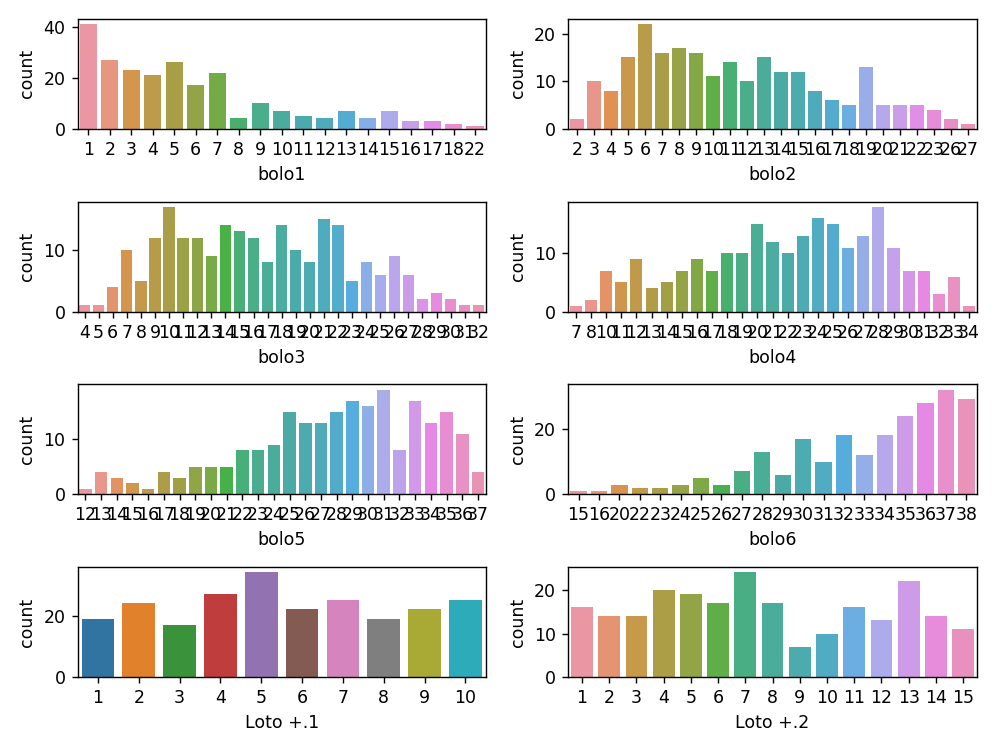

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = [8,6])
sns.countplot(x = 'bolo1',data = base_datos, ax = ax[0,0])
sns.countplot(x = 'bolo2',data = base_datos, ax = ax[0,1])
sns.countplot(x = 'bolo3',data = base_datos, ax = ax[1,0])
sns.countplot(x = 'bolo4',data = base_datos, ax = ax[1,1])
sns.countplot(x = 'bolo5',data = base_datos, ax = ax[2,0])
sns.countplot(x = 'bolo6',data = base_datos, ax = ax[2,1])
sns.countplot(x = 'Loto +.1',data = base_datos, ax = ax[3,0])
sns.countplot(x = 'Loto +.2',data = base_datos, ax = ax[3,1])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


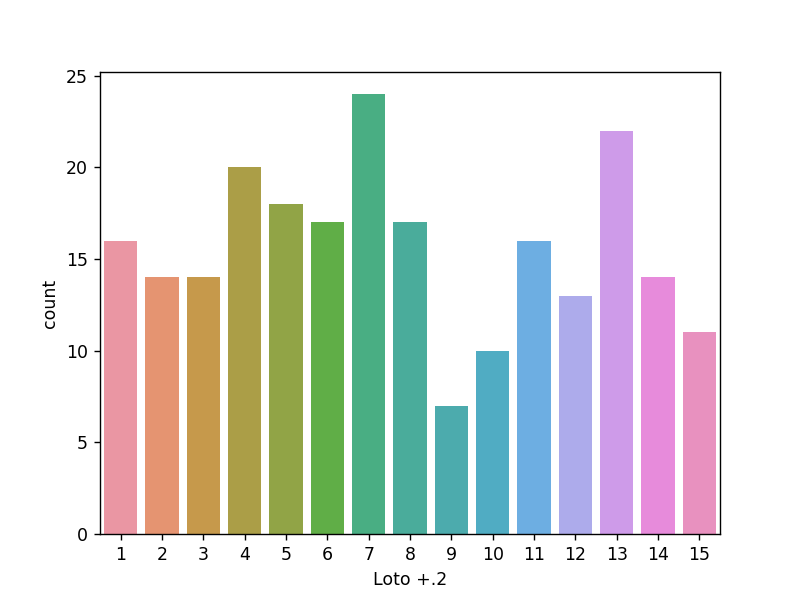

In [103]:
fig, ax = plt.subplots()
sns.countplot(x = 'Loto +.2',data = base_datos)
plt.show()

**Nota:** 
Los numeros que mas salen por bolos son los siguientes:
- bolo1: 1
- bolo2: 6
- bolo3: 10
- bolo4:28
- bolo5 :31
- bolo6 :37 
- Loto ma5   7

###  Filter data

In [7]:
base_datos.columns

Index(['Fecha', 'bolo1', 'bolo2', 'bolo3', 'bolo4', 'bolo5', 'bolo6',
       'Loto +.1', 'Loto +.2'],
      dtype='object')

In [28]:
base_datos.dtypes

Fecha       datetime64[ns]
bolo1                int64
bolo2                int64
bolo3                int64
bolo4                int64
bolo5                int64
bolo6                int64
Loto +.1             int64
Loto +.2             int64
dtype: object

In [21]:
df1 = base_datos[['Fecha', 'bolo1']]
df2 = base_datos[['Fecha', 'bolo2']]
df3 = base_datos[['Fecha', 'bolo3']]
df4 = base_datos[['Fecha', 'bolo4']]
df5 = base_datos[['Fecha', 'bolo5']]
df6 = base_datos[['Fecha', 'bolo6']]
df7 = base_datos[['Fecha', 'Loto +.1']]
df8 = base_datos[['Fecha', 'Loto +.2']]

### Prepare data

In [22]:
df1.columns = ['ds', 'y']
df2.columns = ['ds', 'y']
df3.columns = ['ds', 'y']
df4.columns = ['ds', 'y']
df5.columns = ['ds', 'y']
df6.columns = ['ds', 'y']
df7.columns = ['ds', 'y']
df8.columns = ['ds', 'y']

In [23]:
df1.tail(2)

,ds,y
232,2021-09-22,7
233,2021-09-25,1


### Building the model

In [32]:
from fbprophet import Prophet

In [24]:
m = Prophet(daily_seasonality=True)

In [25]:
model = m.fit(df1)

In [76]:
future = m.make_future_dataframe(periods=3)
future.tail(1)

,ds
235,2021-09-25


In [77]:
forecast = m.predict(future)

In [78]:
int(round(forecast['yhat'].tail(1)))

7

In [33]:
def build_model(data):
    m = Prophet(daily_seasonality=True)
    model = m.fit(data)
    future = m.make_future_dataframe(periods=4)
    forecast = m.predict(future)
    results = int(round(forecast['yhat'].tail(1)))
    return results

In [34]:
build_model(df1)

6

In [27]:
bolo1 = build_model(df1)
bolo2 = build_model(df2)
bolo3 = build_model(df3)
bolo4 = build_model(df4)
bolo5 = build_model(df5)
bolo6 = build_model(df6)
bolo_mas_1 = build_model(df7)
bolo_mas_2 = build_model(df8)

In [29]:
resultados = str(bolo1) + ' '+ str(bolo2) + ' '+ str(bolo3) + ' '+ str(bolo4) + ' '+ str(bolo5) + ' '+ str(bolo6) + ' '+ str(bolo_mas_1) + ' '+ str(bolo_mas_2)

In [30]:
resultados

'6 13 18 21 28 32 5 5'

## Crear modelo sin el 2019

In [2]:
base_datos = pd.read_excel('base.xlsx', sheet_name='sin')
base_datos.head(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2
0,2020-01-04,5,8,15,18,25,30,4,12
1,2020-01-08,13,14,26,27,29,30,5,7


### Preparar los datos

In [3]:
df1 = base_datos[['Fecha', 'bolo1']]
df2 = base_datos[['Fecha', 'bolo2']]
df3 = base_datos[['Fecha', 'bolo3']]
df4 = base_datos[['Fecha', 'bolo4']]
df5 = base_datos[['Fecha', 'bolo5']]
df6 = base_datos[['Fecha', 'bolo6']]
df7 = base_datos[['Fecha', 'Loto +.1']]
df8 = base_datos[['Fecha', 'Loto +.2']]

In [4]:
df1.columns = ['ds', 'y']
df2.columns = ['ds', 'y']
df3.columns = ['ds', 'y']
df4.columns = ['ds', 'y']
df5.columns = ['ds', 'y']
df6.columns = ['ds', 'y']
df7.columns = ['ds', 'y']
df8.columns = ['ds', 'y']

### Crear modelo

In [5]:
from fbprophet import Prophet

In [6]:
def build_model(data):
    m = Prophet(daily_seasonality=True)
    model = m.fit(data)
    future = m.make_future_dataframe(periods=3)
    forecast = m.predict(future)
    results = int(round(forecast['yhat'].tail(1)))
    return results

In [7]:
bolo1 = build_model(df1)
bolo2 = build_model(df2)
bolo3 = build_model(df3)
bolo4 = build_model(df4)
bolo5 = build_model(df5)
bolo6 = build_model(df6)
bolo_mas_1 = build_model(df7)
bolo_mas_2 = build_model(df8)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [8]:
resultados = str(bolo1) + ' '+ str(bolo2) + ' '+ str(bolo3) + ' '+ str(bolo4) + ' '+ str(bolo5) + ' '+ str(bolo6) + ' '+ str(bolo_mas_1) + ' '+ str(bolo_mas_2)

In [9]:
resultados

'7 13 18 22 29 33 6 7'

### Predecir el 2021

In [2]:
import pandas as pd
import numpy as np

In [3]:
base_datos = pd.read_excel('base.xlsx', sheet_name='2021')
base_datos.head(2)

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2
0,2021-01-02,1,3,6,22,24,30,3,7
1,2021-01-06,2,4,22,25,26,36,10,13


### Preparar los datos

In [4]:
df1 = base_datos[['Fecha', 'bolo1']]
df2 = base_datos[['Fecha', 'bolo2']]
df3 = base_datos[['Fecha', 'bolo3']]
df4 = base_datos[['Fecha', 'bolo4']]
df5 = base_datos[['Fecha', 'bolo5']]
df6 = base_datos[['Fecha', 'bolo6']]
df7 = base_datos[['Fecha', 'Loto +.1']]
df8 = base_datos[['Fecha', 'Loto +.2']]

In [8]:
df1.columns = ['ds', 'y']
df2.columns = ['ds', 'y']
df3.columns = ['ds', 'y']
df4.columns = ['ds', 'y']
df5.columns = ['ds', 'y']
df6.columns = ['ds', 'y']
df7.columns = ['ds', 'y']
df8.columns = ['ds', 'y']

### Modelo

In [5]:
from fbprophet import Prophet

In [10]:
def build_model(data):
    m = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model = m.fit(data)
    future = m.make_future_dataframe(periods=3)
    forecast = m.predict(future)
    results = int(round(forecast['yhat'].tail(1)))
    return results

In [11]:
bolo1 = build_model(df1)
bolo2 = build_model(df2)
bolo3 = build_model(df3)
bolo4 = build_model(df4)
bolo5 = build_model(df5)
bolo6 = build_model(df6)
bolo_mas_1 = build_model(df7)
bolo_mas_2 = build_model(df8)

In [12]:
resultados = str(bolo1) + ' '+ str(bolo2) + ' '+ str(bolo3) + ' '+ str(bolo4) + ' '+ str(bolo5) + ' '+ str(bolo6) + ' '+ str(bolo_mas_1) + ' '+ str(bolo_mas_2)

In [13]:
resultados

'13 41 39 41 42 48 11 -6'

##### Nota:  
- El modelo tiene mejor arcierto con la base de datos completa
- Para los de miercoles a sadado el periodo es 3 y de sabado a miercoles es de 4